In [1]:
from pathlib import Path
import pandas as pd 
import urllib
import tarfile
import numpy as np 

- donwload the data

In [2]:
import urllib.request


def load_housing_data():
    file_path = Path("datasets/housing.tgz") 
    if not file_path.is_file(): # download the zip (.tgz file) if doesn't exist
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, file_path)
    with tarfile.open(file_path) as housing_tarball:
        housing_tarball.extractall(path = 'datasets')
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [3]:
housing = load_housing_data() # each row represents one district, 600:3000 people 

- explore the data 

In [4]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()
# <1H OCEAN > less than one hour drive 
# bay is a body of water that is partially enclosed by land, typically connected to a larger body of water like an ocean, sea, or even a large lake.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


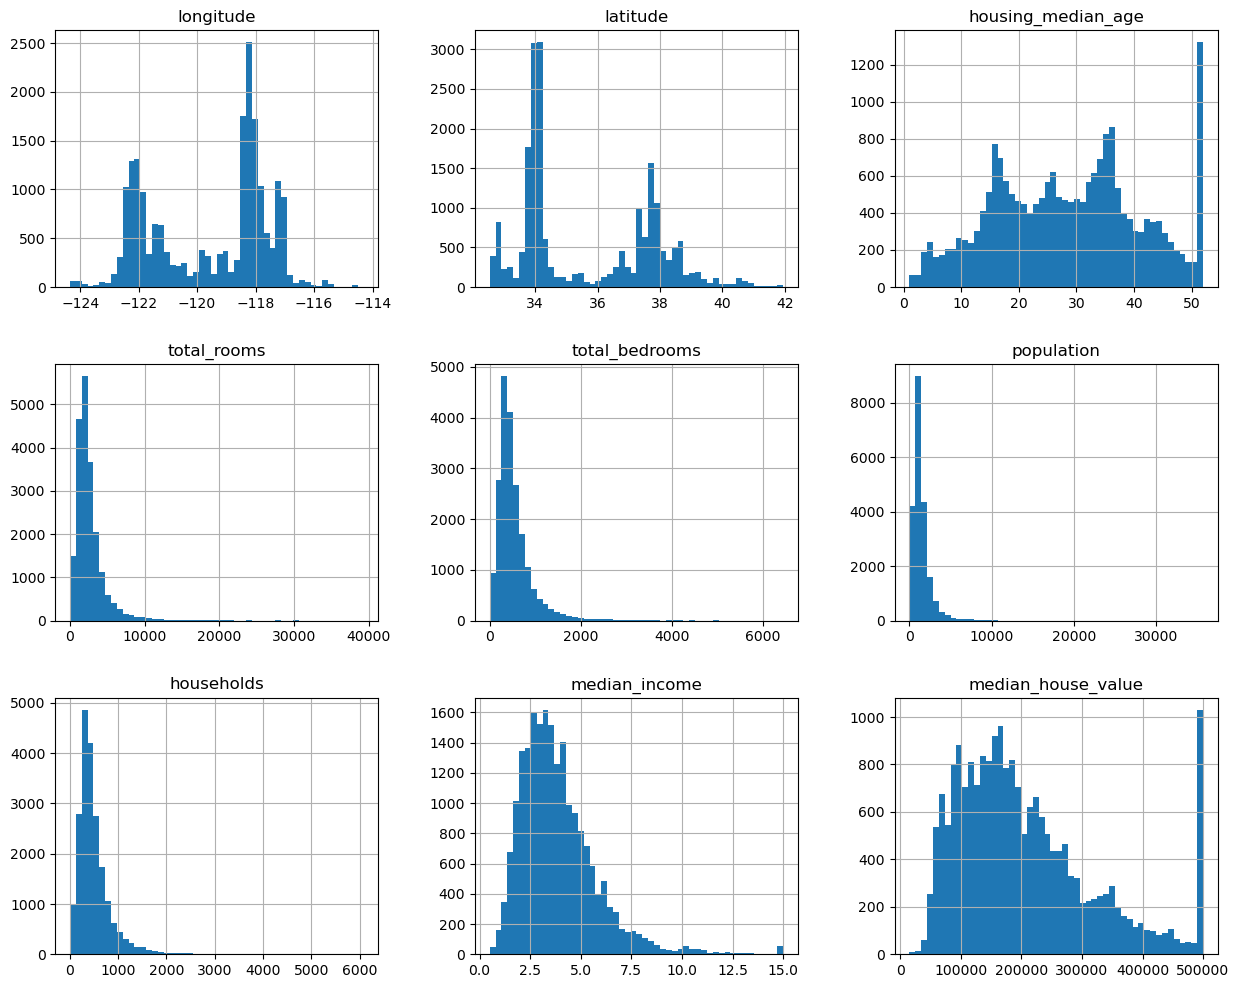

In [8]:
import matplotlib.pyplot as plt 
housing.hist(bins = 50, figsize=(15, 12))
plt.show()

- first off, create a test set

In [9]:
def shuffle_and_split_data(data, test_ratio):
    # could set seed here, but shuffling would change if new data points are fetched
    shuffled_indices = np.random.permutation(len(data))
    test_threshold = int(test_ratio * len(data))
    print("the test threshold is", test_threshold)
    test_indices = shuffled_indices[:test_threshold]
    train_indices = shuffled_indices[test_threshold:]
    train_set = data.iloc[train_indices] # returns a df
    test_set = data.iloc[test_indices]
    return train_set, test_set 

In [10]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(len(train_set))
print(len(test_set))
train_set

the test threshold is 4128
16512
4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19193,-121.30,38.25,27.0,2475.0,548.0,1703.0,517.0,2.5727,86100.0,INLAND
4224,-118.56,34.21,13.0,8327.0,1849.0,4126.0,1773.0,3.7313,189800.0,<1H OCEAN
12297,-118.41,34.25,33.0,827.0,192.0,981.0,184.0,2.6429,143100.0,<1H OCEAN
2392,-122.08,37.38,36.0,1199.0,198.0,485.0,199.0,5.0796,373400.0,NEAR BAY
10070,-122.16,37.46,32.0,2663.0,661.0,1403.0,733.0,4.2667,410200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
17075,-122.24,38.12,39.0,2967.0,500.0,1243.0,523.0,4.2902,152400.0,NEAR BAY
15509,-117.21,34.12,32.0,1677.0,354.0,1021.0,339.0,3.6853,90900.0,INLAND
6695,-120.85,37.05,32.0,2893.0,481.0,1198.0,466.0,3.1719,140600.0,INLAND
8143,-119.01,35.37,38.0,1702.0,380.0,1191.0,366.0,1.8801,57800.0,INLAND


In [11]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) <  test_ratio * 2 ** 32 

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column] # pandas series 
    in_test_set = ids.apply(lambda id: is_id_in_test_set(id, test_ratio)) # boolean pandas series 
    return data[~in_test_set], data[in_test_set]


In [12]:
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, 'index')
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [13]:
# using sklearn's method 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size= 0.2, random_state= 42)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


- important to do stratified sampling to avoid sampling bias

In [14]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0, 1.5, 3, 4.5, 6, np.inf], labels = [1,2,3,4,5])
# stratification on median_income since it most affects the target 

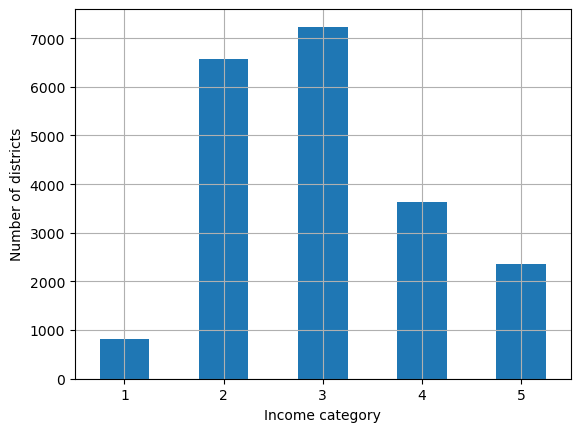

In [15]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot= 0, grid = True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [16]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)
strat_train_set['income_cat'].value_counts() / len(strat_train_set) # see below that the ratios are preserved like the input data in the histogram above

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [17]:
len(strat_test_set)

4128

In [18]:
strat_train_set.drop('income_cat', axis = 1, inplace = True) # revert back to original housing scheme since stratify was only used to avoid sampling bias while generating the test set 
strat_test_set.drop('income_cat', axis = 1, inplace = True)


- data exploration and visualization 

In [19]:
housing = strat_train_set.copy() # cuz will be modifying the housing set later 

In [20]:
len(housing)

16512

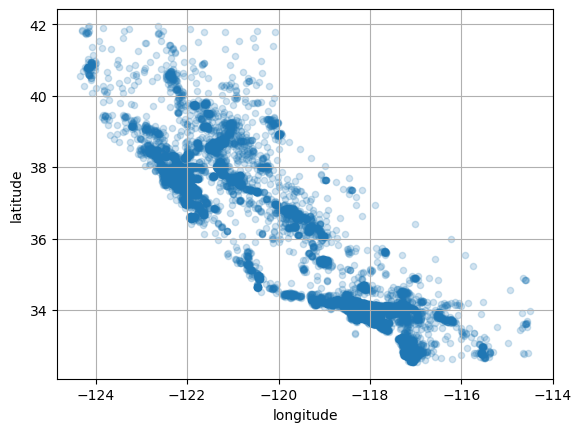

In [21]:
# geographical data > plot longitude vs latitude 
# The plot method on Series and DataFrame is just a simple wrapper around plt.plot()
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2) # alpha to show point density 
plt.show()

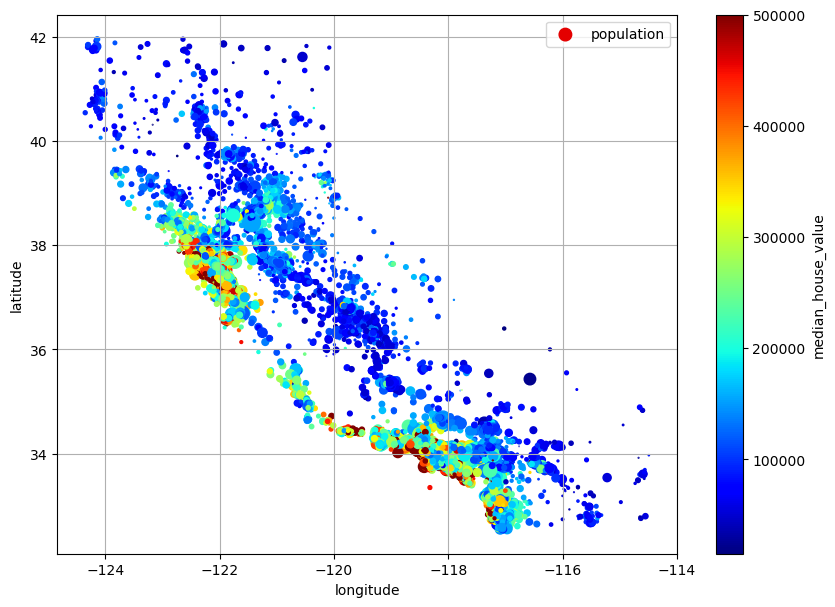

In [22]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True,
             s = housing['population'] / 100, label = 'population',
             c = 'median_house_value', cmap = "jet", colorbar = True, 
             figsize = (10,7), sharex = False, legend = True) 
plt.show()

In [23]:
corr_matrix = housing.corr()
corr_matrix

/var/folders/sr/ng7767n515v9q0pk5vjn_tgh0000gn/T/ipykernel_91095/1253314489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [24]:
corr_matrix['median_house_value'].sort_values(ascending = False)
# prices have a slight tendency to go down when you go north

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [25]:
housing.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

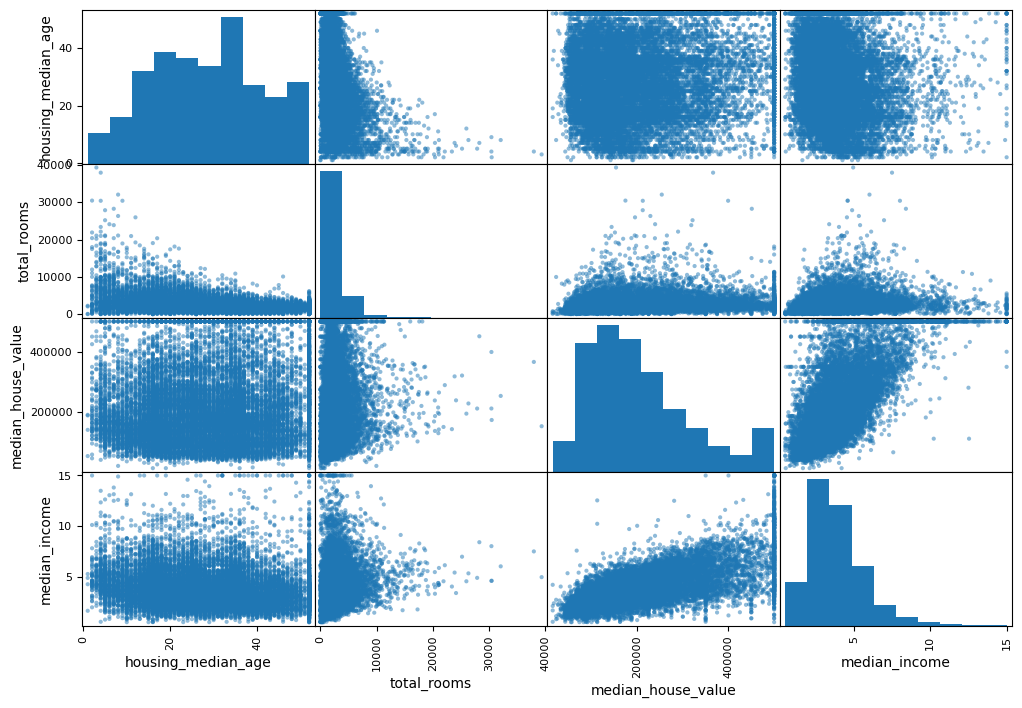

In [26]:
from pandas.plotting import scatter_matrix

attributes = ['housing_median_age', 'total_rooms', 'median_house_value', 'median_income'] # most relevent attributes since the scatter matrix outputs (attributes)^2 graphs 
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

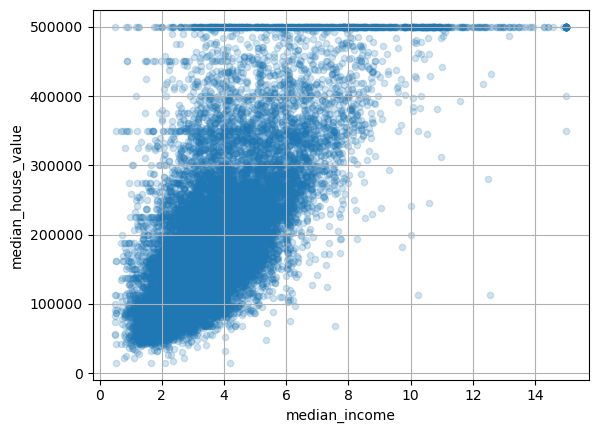

In [27]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', grid = True, alpha = 0.2)
# we see: 1) capped median house values at 500000 USD, and 2) a few horizontal lines around 450k and 350k.

- attribute combination 

In [28]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [29]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

/var/folders/sr/ng7767n515v9q0pk5vjn_tgh0000gn/T/ipykernel_91095/2724363209.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

- prepare the data for the machine learning algorithm 

In [30]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [31]:
# deal with missing values. could fillna but simpleimputer also handles validation and test instances 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [32]:
# impute only works on numerical data 
housing_num = housing.select_dtypes(include = [np.number])
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [33]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [34]:
X = imputer.transform(housing_num) # returns an array 

In [35]:
type(X)

numpy.ndarray

In [36]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


- handling catagorical attributes 

In [37]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [38]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot 

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [39]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [40]:
# cat_encoder = OneHotEncoder(sparse=False)
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# housing_cat_1hot 

In [41]:
print(cat_encoder.categories_)
print(cat_encoder.feature_names_in_) # print the features fed to the estimator
print(cat_encoder.get_feature_names_out())

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
['ocean_proximity']
['ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


In [42]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaler = min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaler

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [43]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaler = std_scaler.fit_transform(housing_num_min_max_scaler)

In [44]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) # fit transform expects 2d input 

model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels) # TODO: why fit X from housing not from housing_num_std_scaler?
some_new_data = housing[['median_income']].iloc[:5]

scaled_predictions = model.predict(some_new_data) # predict takes 2d input 
predictions = target_scaler.inverse_transform(scaled_predictions)
predictions  


array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [45]:
from sklearn.compose import TransformedTargetRegressor # it transforms and inverse-transforms the labels 

model = TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler())
model.fit(housing[['median_income']], housing_labels)
predictions = model.predict(some_new_data)
predictions 

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

- custom transformers 

In [46]:
import numpy as np 
from sklearn.preprocessing import FunctionTransformer

ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
arr = np.array([[1, 2],[3,4]])
ratio_transformer.transform(arr)

array([[0.5 ],
       [0.75]])

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self,n_clusters = 10, gamma = 1.0, random_state = None):
        self.n_clusters = n_clusters
        self.gamma = gamma 
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight = None ):
        self.kmeans = KMeans(self.n_clusters, random_state=self.random_state) 
        self.kmeans.fit(X, sample_weight=sample_weight)
        return self # always return self 
    def transform(self, X):
        return rbf_kernel(X, self.kmeans.cluster_centers_, gamma = self.gamma) 
    # def fit_transform(self, X, y):
    #     self.fit(X, sample_weight=y)
    #     return self.transform(X)
    def get_feature_names_out(self, names = None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]         

In [48]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma = 1., random_state=42)
similarities = cluster_simil.fit_transform(housing[['latitude','longitude']], sample_weight = housing_labels)
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

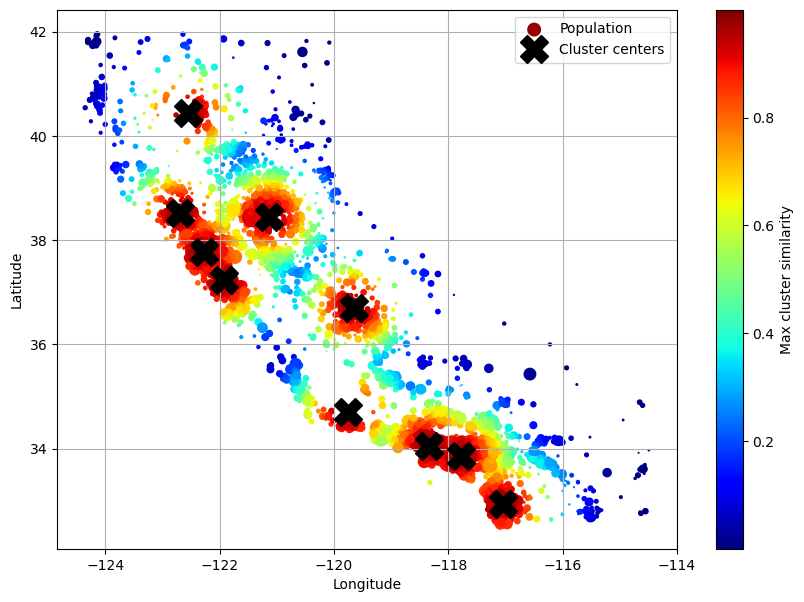

In [49]:
# extra code – this cell generates Figure 2–19
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans.cluster_centers_[:, 1],
         cluster_simil.kmeans.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

- pipelines 

In [50]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("standerdize", StandardScaler())
])
# when we call .transform(), it applied the triggers fit_transform() to all transformers and does .fit() on the last estimator 
# if the last parameter is a predictor, it uses .predict() for it.

In [51]:
import sklearn 
sklearn.set_config(display="diagram") # for interactive pipelining 
num_pipeline

,steps,"[('impute', ...), ('standerdize', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [52]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
# housing_num_prepared[:,0].mean() # -4.837215899151699e-15 approx. 0 
# housing_num_prepared[:,0].std() # 1



In [53]:
housing_num 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [54]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns = num_pipeline.get_feature_names_out(), index = housing_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [55]:
# accessing a pipeline 
# supports indexing and other access features 
num_pipeline[0]

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [56]:
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

cat_pipeline = Pipeline([
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include = np.number)), # the last argument selects numberical (and below)/ catagorical columns automatically
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
])

In [57]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [58]:
housing_prepared_df = pd.DataFrame(housing_prepared, columns = preprocessing.get_feature_names_out(), index = housing.index)
housing_prepared_df # when calling get_features_names_out() from this preprocessor, it will append num__ and cat__ to each num/ cat column. we can *try* use make_column_transformer instead

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [59]:
preprocessing

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [61]:
preprocessing = make_column_transformer([
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include= object))
])
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared_df = pd.DataFrame(housing_prepared, columns = preprocessing.get_feature_names_out(), index = housing.index)
housing_prepared_df


TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. '(Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standerdize', StandardScaler())]), <sklearn.compose._column_transformer.make_column_selector object at 0x304fc7b90>)' (type <class 'tuple'>) doesn't.

- combining all transformations so far 

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]
def ratio_name(function_transformer, features_in):
    return ['ratio']
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )
# note the order below, first get rid of NaNs, then get the logs, then standerdize.
log_pipeline = make_pipeline(SimpleImputer(strategy='median'), FunctionTransformer(np.log, feature_names_out='one-to-one'), StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma = 1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "population", "households", "median_income", "total_rooms"]), 
    ("geo", cluster_simil, ['latitude', 'longitude']),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], remainder = default_num_pipeline) # one columnl left, housing_median_age

In [61]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [62]:
housing_prepared = preprocessing.fit_transform(housing)

In [63]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__population', 'log__households', 'log__median_income',
       'log__total_rooms', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [64]:
housing_prepared.shape 

(16512, 24)

- select and train a model 

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)


,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [66]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5]

array([245970.16089317, 372738.06971505, 135706.80183573,  91440.93299445,
       330873.54029151])

In [67]:
housing_labels[:5]

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

In [68]:
housing_predictions

array([245970.16089317, 372738.06971505, 135706.80183573, ...,
       191495.96344461, 308664.11212513, 254853.51288995])

In [69]:
from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68972.88910758459

In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [71]:
housing_predictions = tree_reg.predict(housing)
root_mean_squared_error(housing_labels, housing_predictions)

0.0

In [72]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, cv = 10, scoring = "neg_root_mean_squared_error")
tree_rmses

array([62894.43358863, 66419.47966961, 66943.76104687, 65731.65908149,
       66540.68201462, 65281.52985305, 65086.26309766, 68214.866274  ,
       67064.23190225, 67213.13602862])

In [73]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66139.004256
std       1481.116267
min      62894.433589
25%      65394.062160
50%      66480.080842
75%      67034.114188
max      68214.866274
dtype: float64

In [74]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
random_forest_reg.fit(housing, housing_labels)



,steps,"[('columntransformer', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [75]:
random_forest_rmses = -cross_val_score(random_forest_reg, housing, housing_labels, cv = 10, scoring = "neg_root_mean_squared_error")


In [76]:
pd.Series(random_forest_rmses).describe()

count       10.000000
mean     47063.686471
std       1064.611602
min      45512.144742
25%      46529.057922
50%      47151.523062
75%      47506.788763
max      49246.966030
dtype: float64

In [77]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_gird = [
    {'preprocessing__geo__n_clusters': [5, 8, 10], 'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6,8,10]},
]

grid_search = GridSearchCV(full_pipeline, param_gird, cv = 3, scoring= "neg_root_mean_squared_error")
grid_search.fit(housing, housing_labels)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'preprocessing__geo__n_clusters': [5, 8, ...], 'random_forest__max_features': [4, 6, ...]}, {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6, 8, ...]}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"


In [78]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [79]:
grid_search.best_score_

-43773.912910000676

In [80]:
grid_search.cv_results_

{'mean_fit_time': array([2.83084702, 3.83312996, 4.76091401, 2.71169893, 4.04382189,
        5.17587471, 2.8088731 , 3.93983833, 5.14004938, 4.10281952,
        5.06430705, 6.24165535, 4.18749094, 5.57156301, 6.66474771]),
 'std_fit_time': array([0.16633692, 0.03543386, 0.05391339, 0.03617057, 0.07224873,
        0.06263751, 0.06838591, 0.03252204, 0.14610023, 0.12801161,
        0.1025433 , 0.05869247, 0.07946293, 0.17472225, 0.42300583]),
 'mean_score_time': array([0.11816367, 0.0965263 , 0.09466664, 0.0912954 , 0.11218166,
        0.11742775, 0.09812474, 0.10566036, 0.10423247, 0.12001928,
        0.17898234, 0.0985717 , 0.11029506, 0.1194977 , 0.10746566]),
 'std_score_time': array([0.03026207, 0.00439408, 0.00176326, 0.00079433, 0.01373523,
        0.0097923 , 0.00769138, 0.00755807, 0.01047306, 0.02231696,
        0.10953566, 0.00888203, 0.02175773, 0.01526987, 0.01034907]),
 'param_preprocessing__geo__n_clusters': masked_array(data=[5, 5, 5, 8, 8, 8, 10, 10, 10, 10, 10, 10, 15, 

In [81]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.830847,0.166337,0.118164,0.030262,5,4,"{'preprocessing__geo__n_clusters': 5, 'random_...",-46106.043513,-46116.973438,-47347.711477,-46523.576143,582.768767,13
1,3.833130,0.035434,0.096526,0.004394,5,6,"{'preprocessing__geo__n_clusters': 5, 'random_...",-46657.455908,-46502.519900,-47336.593215,-46832.189674,362.232421,14
2,4.760914,0.053913,0.094667,0.001763,5,8,"{'preprocessing__geo__n_clusters': 5, 'random_...",-46869.634639,-46893.145806,-47643.628995,-47135.469813,359.450979,15
3,2.711699,0.036171,0.091295,0.000794,8,4,"{'preprocessing__geo__n_clusters': 8, 'random_...",-44354.832828,-44609.742001,-45454.581194,-44806.385341,470.009269,7
4,4.043822,0.072249,0.112182,0.013735,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-44895.144555,-44982.543267,-45253.420496,-45043.702773,152.524919,10
5,5.175875,0.062638,0.117428,0.009792,8,8,"{'preprocessing__geo__n_clusters': 8, 'random_...",-45226.565914,-45359.708182,-46010.844330,-45532.372809,342.668901,12
6,2.808873,0.068386,0.098125,0.007691,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43820.454559,-44170.366038,-45021.666204,-44337.495600,504.431410,3
7,3.939838,0.032522,0.105660,0.007558,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44094.991650,-44127.608867,-44966.692230,-44396.430915,403.455447,4
8,5.140049,0.146100,0.104232,0.010473,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-44385.075583,-45211.221127,-45361.068126,-44985.788279,429.150586,8
9,4.102820,0.128012,0.120019,0.022317,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44094.991650,-44127.608867,-44966.692230,-44396.430915,403.455447,4


In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_distribs = [
    {'preprocessing__geo__n_clusters': randint(low = 3, high = 50), 'random_forest__max_features': randint(low = 2, high = 20)}
]

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=10, cv = 3, scoring = 'neg_root_mean_squared_error', random_state=42 )
rnd_search.fit(housing, housing_labels)

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,11.060240,0.295354,0.157871,0.015098,41,16,"{'preprocessing__geo__n_clusters': 41, 'random...",-42462.994034,-43044.164910,-43286.011801,-42931.056915,345.383482,3
1,6.326257,0.080546,0.133523,0.005543,45,9,"{'preprocessing__geo__n_clusters': 45, 'random...",-41352.385136,-42363.242660,-42767.018745,-42160.882180,594.984249,1
2,5.288560,0.016219,0.090928,0.000257,23,8,"{'preprocessing__geo__n_clusters': 23, 'random...",-42538.340393,-43174.814817,-43918.531316,-43210.562175,564.027275,5
3,7.785925,0.078445,0.091070,0.000509,21,12,"{'preprocessing__geo__n_clusters': 21, 'random...",-43355.549776,-43986.448644,-44449.931685,-43930.643368,448.518756,9
4,3.353754,0.060550,0.090437,0.000166,13,5,"{'preprocessing__geo__n_clusters': 13, 'random...",-42859.429801,-43521.680219,-44506.430160,-43629.180060,676.668165,7
5,3.081727,0.021750,0.132001,0.001611,42,4,"{'preprocessing__geo__n_clusters': 42, 'random...",-41882.080932,-43674.739302,-43902.173031,-43152.997755,903.457693,4
6,2.354999,0.021855,0.132580,0.003183,24,3,"{'preprocessing__geo__n_clusters': 24, 'random...",-42388.024664,-43555.614220,-44155.168487,-43366.269123,733.752000,6
7,8.343321,0.032290,0.128071,0.007246,26,13,"{'preprocessing__geo__n_clusters': 26, 'random...",-43119.849969,-43522.241786,-44299.032431,-43647.041395,489.420764,8
8,4.784712,0.016864,0.130129,0.007460,32,7,"{'preprocessing__geo__n_clusters': 32, 'random...",-41752.605233,-42427.821549,-43227.070102,-42469.165628,602.657262,2
9,1.525541,0.022758,0.089488,0.000168,4,2,"{'preprocessing__geo__n_clusters': 4, 'random_...",-49068.133800,-48798.541896,-50040.422121,-49302.365939,533.363631,10


In [ ]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_ 
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.02, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.02, 0.01, 0.01, 0.01, 0.01, 0.04, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [ ]:
sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse=True)

[(0.19331697479927867, 'log__median_income'),
 (0.07965822681595995, 'cat__ocean_proximity_INLAND'),
 (0.060710723693179904, 'bedrooms__ratio'),
 (0.05582091008297874, 'rooms_per_house__ratio'),
 (0.04961682489538141, 'people_per_house__ratio'),
 (0.039030275595245356, 'geo__Cluster 30 similarity'),
 (0.02456912107044826, 'geo__Cluster 25 similarity'),
 (0.023218179010744626, 'geo__Cluster 36 similarity'),
 (0.021964211167019822, 'geo__Cluster 9 similarity'),
 (0.019427395671564488, 'geo__Cluster 1 similarity'),
 (0.018247627904808595, 'geo__Cluster 37 similarity'),
 (0.01696225715421639, 'geo__Cluster 34 similarity'),
 (0.015871012244542126, 'geo__Cluster 18 similarity'),
 (0.015402570218064723, 'geo__Cluster 3 similarity'),
 (0.015263583381543728, 'geo__Cluster 0 similarity'),
 (0.014404268187770436, 'geo__Cluster 28 similarity'),
 (0.014403655974361837, 'geo__Cluster 35 similarity'),
 (0.012533925335895988, 'geo__Cluster 26 similarity'),
 (0.012496040602311659, 'geo__Cluster 7 simil

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set['median_house_value'].copy()

final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

41648.00189086115

## Project
### Experimenting with SVM

In [96]:
from sklearn.svm import SVR 

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("svm_reg", SVR())
])

param_gird = [
    {'svm_reg__kernel': ['linear'], 'svm_reg__C': [0.1, 1, 10, 100, 100000] },
    {'svm_reg__kernel': ['rbf'], 'svm_reg__C': [0.1, 1, 10, 100, 100000], 'svm_reg__gamma': ['scale', 'auto'] },

]

grid_search = GridSearchCV(full_pipeline, param_gird, cv = 3, scoring= "neg_root_mean_squared_error")
grid_search.fit(housing[:5000], housing_labels[:5000])

,estimator,"Pipeline(step...reg', SVR())])"
,param_grid,"[{'svm_reg__C': [0.1, 1, ...], 'svm_reg__kernel': ['linear']}, {'svm_reg__C': [0.1, 1, ...], 'svm_reg__gamma': ['scale', 'auto'], 'svm_reg__kernel': ['rbf']}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"


In [97]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_reg__C,param_svm_reg__kernel,param_svm_reg__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.261904,0.021308,0.075421,0.000484,0.1,linear,NaN,"{'svm_reg__C': 0.1, 'svm_reg__kernel': 'linear'}",-120211.660829,-122451.442870,-116096.798901,-119586.634200,2631.649509,11
1,0.277600,0.051224,0.075135,0.000050,1.0,linear,NaN,"{'svm_reg__C': 1, 'svm_reg__kernel': 'linear'}",-118501.271743,-120584.513069,-114515.902573,-117867.229128,2517.739180,8
2,0.255424,0.022651,0.074647,0.000123,10.0,linear,NaN,"{'svm_reg__C': 10, 'svm_reg__kernel': 'linear'}",-106135.817586,-107064.824543,-102000.759713,-105067.133947,2201.174185,5
3,0.238072,0.000923,0.074583,0.000370,100.0,linear,NaN,"{'svm_reg__C': 100, 'svm_reg__kernel': 'linear'}",-80765.184730,-80991.959146,-76973.445977,-79576.863285,1843.220536,4
4,0.924776,0.072531,0.077550,0.002586,100000.0,linear,NaN,"{'svm_reg__C': 100000, 'svm_reg__kernel': 'lin...",-77420.624577,-70460.086740,-64778.414801,-70886.375373,5169.955416,3
5,0.305110,0.010674,0.224848,0.000991,0.1,rbf,scale,"{'svm_reg__C': 0.1, 'svm_reg__gamma': 'scale',...",-120440.508928,-122657.352618,-116277.055847,-119791.639131,2644.846653,14
6,0.297356,0.001796,0.234323,0.003939,0.1,rbf,auto,"{'svm_reg__C': 0.1, 'svm_reg__gamma': 'auto', ...",-120441.584047,-122658.616931,-116278.025556,-119792.742178,2644.961676,15
7,0.306715,0.002762,0.232945,0.005649,1.0,rbf,scale,"{'svm_reg__C': 1, 'svm_reg__gamma': 'scale', '...",-120341.769423,-122571.363937,-116199.346705,-119704.160022,2640.146488,12
8,0.288151,0.002850,0.226271,0.002104,1.0,rbf,auto,"{'svm_reg__C': 1, 'svm_reg__gamma': 'auto', 's...",-120352.513943,-122584.001329,-116211.334722,-119715.949998,2640.281572,13
9,0.285836,0.001224,0.224492,0.000124,10.0,rbf,scale,"{'svm_reg__C': 10, 'svm_reg__gamma': 'scale', ...",-119522.730995,-121718.527859,-115418.549962,-118886.602939,2610.992730,9


In [98]:
-grid_search.best_score_

55600.34544685361

### Try using ```SelectForModel```


In [109]:
from sklearn.feature_selection import SelectFromModel

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("selector", SelectFromModel(RandomForestRegressor(random_state=42),  threshold = 0.005)),
    ("svm_reg", SVR())
])

param_gird = [
    {'svm_reg__kernel': ['linear'], 'svm_reg__C': [0.1, 1, 10, 100, 100000] },
    {'svm_reg__kernel': ['rbf'], 'svm_reg__C': [0.1, 1, 10, 100, 100000], 'svm_reg__gamma': ['scale', 'auto'] },

]

grid_search = GridSearchCV(full_pipeline, param_gird, cv = 3, scoring= "neg_root_mean_squared_error")
grid_search.fit(housing[:5000], housing_labels[:5000])

,estimator,"Pipeline(step...reg', SVR())])"
,param_grid,"[{'svm_reg__C': [0.1, 1, ...], 'svm_reg__kernel': ['linear']}, {'svm_reg__C': [0.1, 1, ...], 'svm_reg__gamma': ['scale', 'auto'], 'svm_reg__kernel': ['rbf']}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"


In [ ]:
grid_search.best_score_
# feature selection doesn't seem to be useful in this context, at least with the hyperparameters I choose so far

-56265.97450495785

### Adding a 'nearst_district_housing_median_price' feature via a custom `KNeighborsRegressor` transformer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsRegressor

class NNDistrictPrice(BaseEstimator, TransformerMixin):
    def __init__(self,n_neighbors = 10, random_state = None):
        self.n_neighbors = n_neighbors
        self.random_state = random_state
    def fit(self, X, y):
        self.knn = KNeighborsRegressor(self.n_neighbors) 
        self.knn.fit(X, y)
        return self
    def transform(self, X):
        predictions = self.knn.predict(X)
        return predictions.reshape(-1,1)
    def get_feature_names_out(self, names = None):
        return 'knn_feature' 

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]
def ratio_name(function_transformer, features_in):
    return ['ratio']
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )
log_pipeline = make_pipeline(SimpleImputer(strategy='median'), FunctionTransformer(np.log, feature_names_out='one-to-one'), StandardScaler())

knn_median_house_value = NNDistrictPrice(n_neighbors=20, random_state=42)
cluster_simil = ClusterSimilarity(n_clusters=10, gamma = 1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
preprocessing_with_knn = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "population", "households", "median_income", "total_rooms"]), 
    ("geo", cluster_simil, ['latitude', 'longitude']),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ("knn_feature", knn_median_house_value, ['latitude', 'longitude'])
], remainder = default_num_pipeline) 

In [160]:
from sklearn.neighbors import KNeighborsRegressor
knn = make_pipeline(preprocessing_with_knn, KNeighborsRegressor(n_neighbors=10)) 

In [161]:
knn.fit(housing, housing_labels)

,steps,"[('columntransformer', ...), ('kneighborsregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [162]:
predictions = knn.predict(housing)
predictions

array([461580.6, 373940. , 129920. , ..., 148890. , 500001. , 221150. ])

In [163]:
root_mean_squared_error(housing_labels, predictions)

48264.91697425046

In [164]:
preprocessing_with_knn.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__population', 'log__households', 'log__median_income',
       'log__total_rooms', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'knn_feature__k', 'knn_feature__n', 'knn_feature__n',
       'knn_feature___', 'knn_feature__f', 'knn_feature__e',
       'knn_feature__a', 'knn_feature__t', 'knn_feature__u',
       'knn_feature__r', 'knn_feature__e',
       'remainder__housing_median_age'], dtype=object)